# Lecture Rio Primero

In [19]:
import os
import numpy as np
import flopy.modflow as mf

In [20]:
# Set name for MODFLOW model
modelname = 'RioPrimero'

In [21]:
model = mf.Modflow(modelname='RP1', exe_name='mf2005', version='mf2005', model_ws='data')

In [22]:
# Model domain and grid definition
Lx = 11250.0  #aquifer length in x-direction
Ly = 6000.0  #aquifer length in y-direction
nlay = 3  #number of layers
nrow = 6  #number of rows
ncol = 10  #number of columns

delr = Lx / ncol  #cell width along x-direction
delc = Ly / nrow  #cell width along y-direction

dis = mf.ModflowDis(model, nlay=nlay, nrow=nrow, ncol=ncol, delr=delr, delc=delc, top=460,
                    botm=[450, 448, 390], nper=1, perlen=1827, nstp=1, steady=True, itmuni=4, lenuni=2)
dis


    MODFLOW Discretization Package Class.

    Parameters
    ----------
    model : model object
        The model object (of type :class:`flopy.modflow.Modflow`) to which
        this package will be added.
    nlay : int
        Number of model layers (the default is 1).
    nrow : int
        Number of model rows (the default is 2).
    ncol : int
        Number of model columns (the default is 2).
    nper : int
        Number of model stress periods (the default is 1).
    delr : float or array of floats (ncol), optional
        An array of spacings along a row (the default is 1.0).
    delc : float or array of floats (nrow), optional
        An array of spacings along a column (the default is 0.0).
    laycbd : int or array of ints (nlay), optional
        An array of flags indicating whether or not a layer has a Quasi-3D
        confining bed below it. 0 indicates no confining bed, and not zero
        indicates a confining bed. LAYCBD for the bottom layer must be 0. (the
    

[<Axes: title={'center': ' model_top'}>,
 <Axes: title={'center': 'botm layer 1'}>,
 <Axes: title={'center': 'botm layer 2'}>,
 <Axes: title={'center': 'botm layer 3'}>]

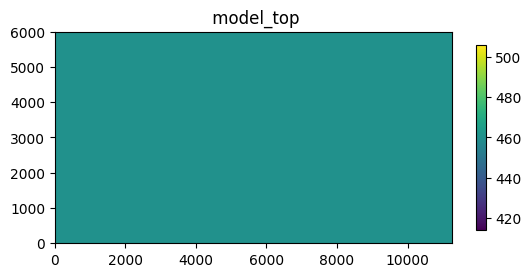

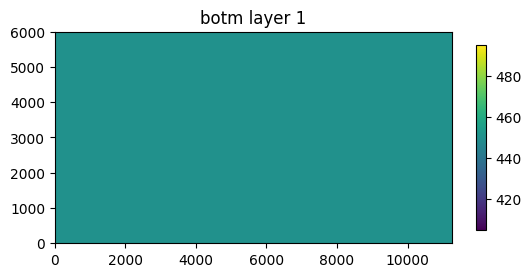

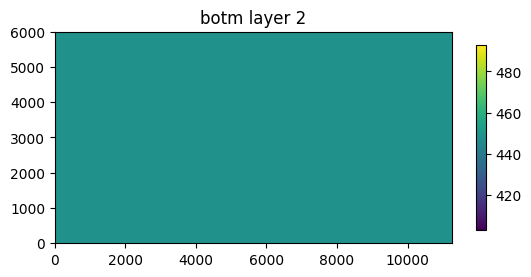

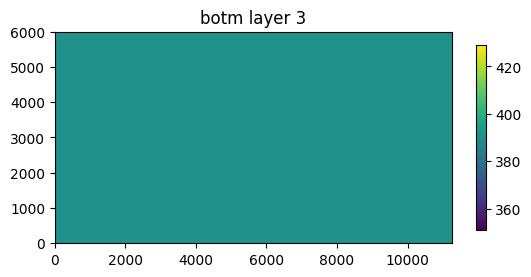

In [23]:
dis.plot()

[<Axes: title={'center': 'ibound layer 1'}>,
 <Axes: title={'center': 'ibound layer 2'}>,
 <Axes: title={'center': 'ibound layer 3'}>,
 <Axes: title={'center': 'strt layer 1'}>,
 <Axes: title={'center': 'strt layer 2'}>,
 <Axes: title={'center': 'strt layer 3'}>]

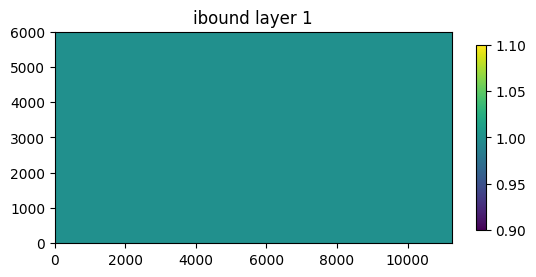

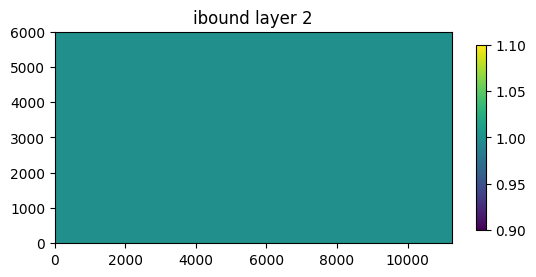

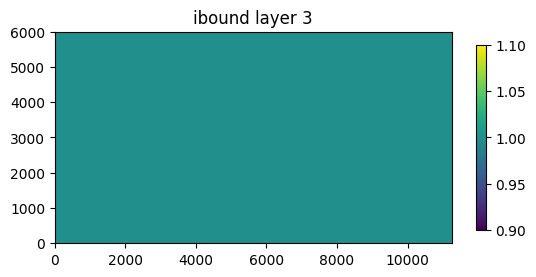

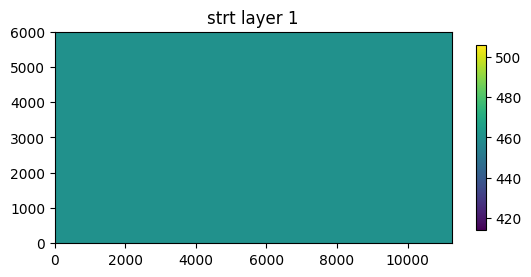

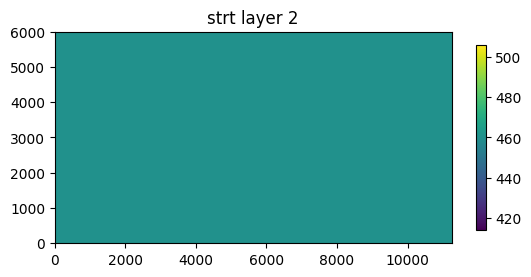

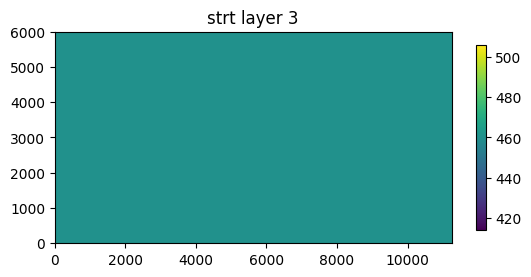

In [24]:
bas = mf.ModflowBas(model, ibound=1, strt=460)
bas.plot()

[<Axes: title={'center': ' GHB location stress period 1 layer 1'}>,
 <Axes: title={'center': ' GHB location stress period 1 layer 2'}>,
 <Axes: title={'center': ' GHB location stress period 1 layer 3'}>]

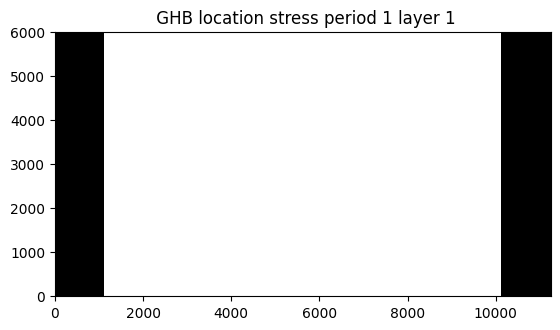

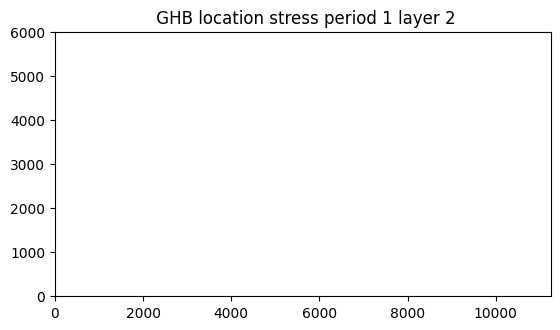

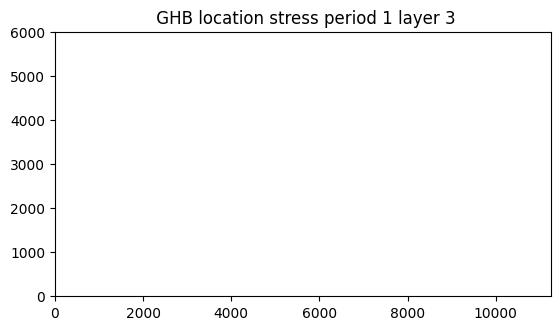

In [25]:
ghb_west_sp_data = {0: [
  [0, 0, 0, 450, 200],
  [0, 1, 0, 450, 200],
  [0, 2, 0, 450, 200],
  [0, 3, 0, 450, 200],
  [0, 4, 0, 450, 200],
  [0, 5, 0, 450, 200],
  [0, 0, 9, 445, 200],
  [0, 1, 9, 445, 200],
  [0, 2, 9, 445, 200],
  [0, 3, 9, 445, 200],
  [0, 4, 9, 445, 200],
  [0, 5, 9, 445, 200],
]}

ghb = mf.ModflowGhb(model, stress_period_data=ghb_west_sp_data)
ghb.plot()

In [26]:
rch = mf.ModflowRch(model, rech=0.00033)

In [27]:
riv_sp_data = {0: [
  [0, 5, 1, 455, 86.4, 453],
  [0, 4, 2, 455, 86.4, 453],
  [0, 4, 3, 455, 86.4, 453],
  [0, 3, 4, 455, 86.4, 453],
  [0, 2, 5, 455, 86.4, 453],
  [0, 3, 6, 455, 86.4, 453],
  [0, 3, 7, 455, 86.4, 453],
  [0, 2, 8, 455, 86.4, 453],
  [0, 1, 9, 455, 86.4, 453],
]}
riv = mf.ModflowRiv(model, stress_period_data=riv_sp_data)

In [28]:
# Well data
wel = mf.ModflowWel(model, stress_period_data={
  0: [
    [0, 1, 1, -5000],
    [0, 0, 2, -10000],
    [0, 5, 5, -5000],
    [0, 0, 8, -5000],
    [0, 1, 6, -16000],
  ]
})


In [29]:
# Flow data
lpf = mf.ModflowLpf(model, hk=[8.64, 1, 8.64], vka=[0.864, 0.1, 0.864], ss=1e-5, sy=0.2)

In [30]:
pcg = mf.ModflowPcg(model, rclose=1e-2, hclose=1e-2)
oc = mf.ModflowOc(model)

In [31]:
# Write the MODFLOW model input files

In [32]:
model.write_input()
model.run_model()

FloPy is using the following executable to run the model: ../../../.venv/bin/mf2005

                                  MODFLOW-2005     
    U.S. GEOLOGICAL SURVEY MODULAR FINITE-DIFFERENCE GROUND-WATER FLOW MODEL
                             Version 1.12.00 2/3/2017                        

 Using NAME file: RP1.nam 
 Run start date and time (yyyy/mm/dd hh:mm:ss): 2023/12/18 11:47:14

 Solving:  Stress period:     1    Time step:     1    Ground-Water Flow Eqn.
 Run end date and time (yyyy/mm/dd hh:mm:ss): 2023/12/18 11:47:14
 Elapsed run time:  0.011 Seconds

  Normal termination of simulation


(True, [])

In [33]:
# Post process the results

In [34]:
import flopy.utils as fu

hds = fu.HeadFile(os.path.join('data', 'RP1.hds'))
h = hds.get_data(kstpkper=(0, 0))

[]

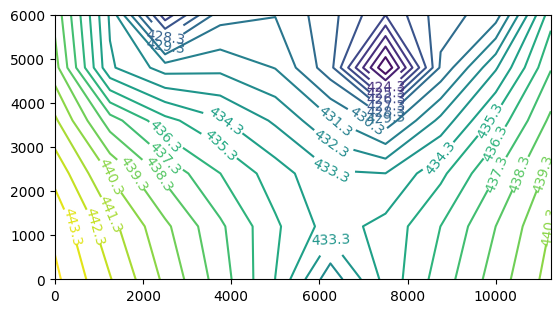

In [35]:
import matplotlib.pyplot as plt
%matplotlib inline

x = np.linspace(0, delr * ncol, ncol)
y = np.linspace(delc * nrow, 0, nrow)

c = plt.contour(x, y, h[0], np.arange(h[0].min(), h[0].max(), 1))
plt.clabel(c, fmt='%2.1f')
plt.axis('scaled')
plt.plot()

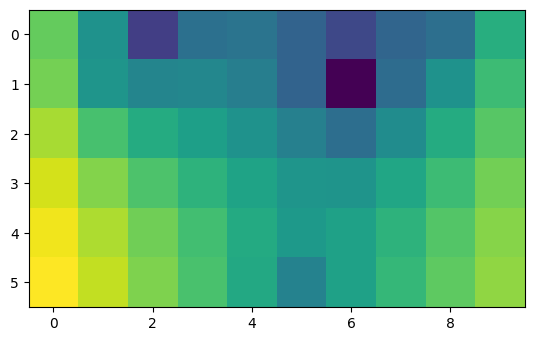

In [36]:
plt.imshow(h[0])